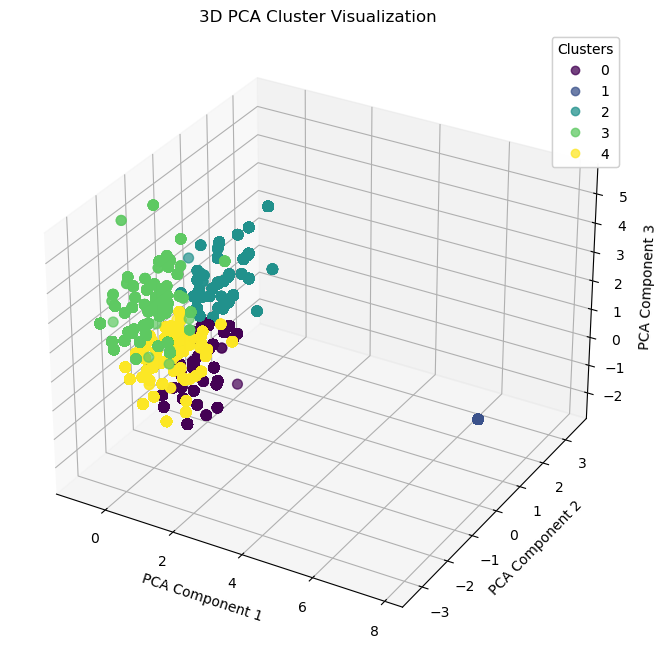

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load data in chunks and optimize data types (as previously shown)
file_path = 'cleanedData1.csv'  # Replace with the path to your file
columns_to_load = ['psyte_householdIncomeVariable.description', 'psyte_propertyValueVariable.description', 'psyte_propertyTenureVariable.description', 'psyte_urbanRuralVariable.description']  # Specify necessary columns only
chunk_size = 50000
data_chunks = []

for chunk in pd.read_csv(file_path, usecols=columns_to_load, chunksize=chunk_size, low_memory=False):
    # Optimize data types within each chunk
    for col in chunk.select_dtypes(include=['float64']).columns:
        chunk[col] = chunk[col].astype('float32')
    for col in chunk.select_dtypes(include=['int64']).columns:
        chunk[col] = chunk[col].astype('int32')
    for col in chunk.select_dtypes(include=['object']).columns:
        chunk[col] = chunk[col].astype('category')
    data_chunks.append(chunk)

df = pd.concat(data_chunks, ignore_index=True)

# Step 2: Encode categorical columns
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Step 4: Apply PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Step 5: Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_pca)
df['Cluster'] = clusters  # Add clusters to the original DataFrame

# Step 6: 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Cluster Visualization")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_35856\4151549746.py:6: DtypeWarning: Columns (70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


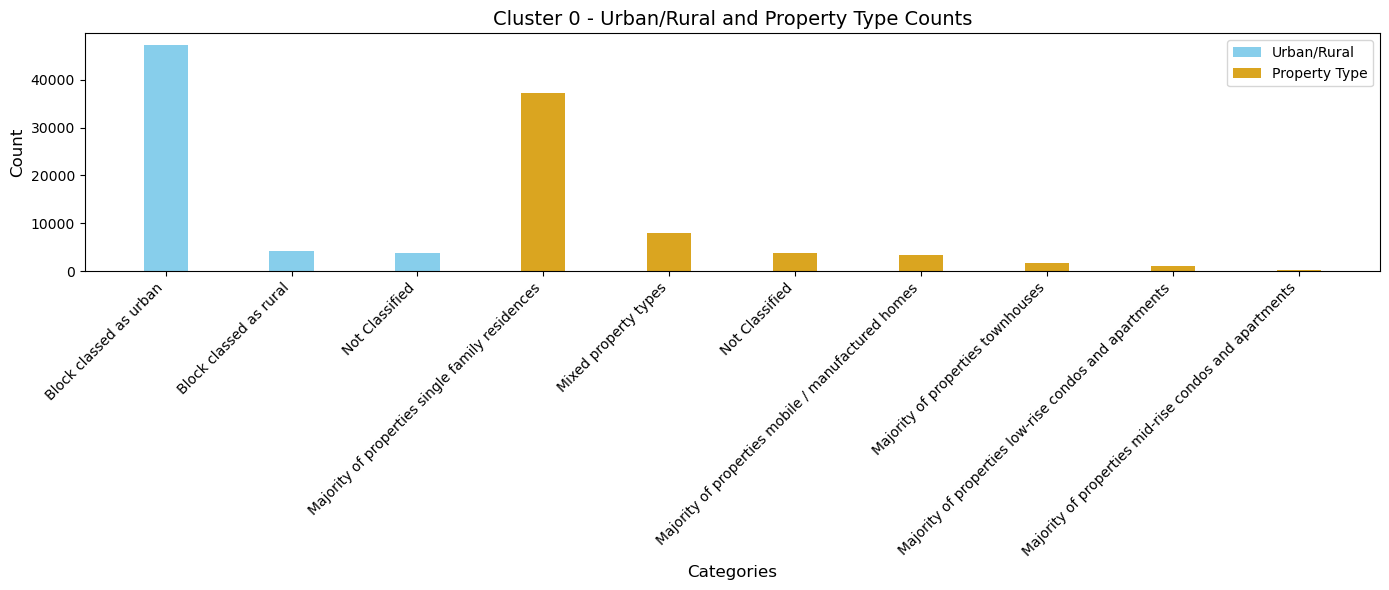

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'cleanedData1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# 1. Identify and rename relevant columns (adjust column names if needed)
df.rename(columns={'psyte_urbanRuralVariable.description': 'Urban/Rural', 
                   'psyte_propertyTypeVariable.description': 'Property Type'}, inplace=True)

# 2. Count occurrences for Urban/Rural
urban_rural_counts = df['Urban/Rural'].value_counts().reset_index()
urban_rural_counts.columns = ['Urban/Rural', 'Count']

# 3. Count occurrences for Property Type
property_type_counts = df['Property Type'].value_counts().reset_index()
property_type_counts.columns = ['Property Type', 'Count']

# 4. Set the bar positions
bar_width = 0.35
urban_rural_x_labels = np.arange(len(urban_rural_counts))  # Positions for Urban/Rural bars
property_type_x_labels = np.arange(len(property_type_counts)) + len(urban_rural_counts)  # Shifted positions for Property Type bars

# 5. Create the bar plot
plt.figure(figsize=(14, 6))  # Increase figure size

# Plot Urban/Rural
plt.bar(urban_rural_x_labels, urban_rural_counts['Count'], width=bar_width, color='skyblue', label='Urban/Rural')

# Plot Property Type
plt.bar(property_type_x_labels, property_type_counts['Count'], width=bar_width, color='goldenrod', label='Property Type')

# Add labels and title
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Cluster 0 - Urban/Rural and Property Type Counts', fontsize=14)

# Set x-ticks with category names
combined_labels = np.concatenate([urban_rural_counts['Urban/Rural'].tolist(), property_type_counts['Property Type'].tolist()])
plt.xticks(np.concatenate([urban_rural_x_labels, property_type_x_labels]), combined_labels, rotation=45, ha='right', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_35856\330226319.py:6: DtypeWarning: Columns (70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


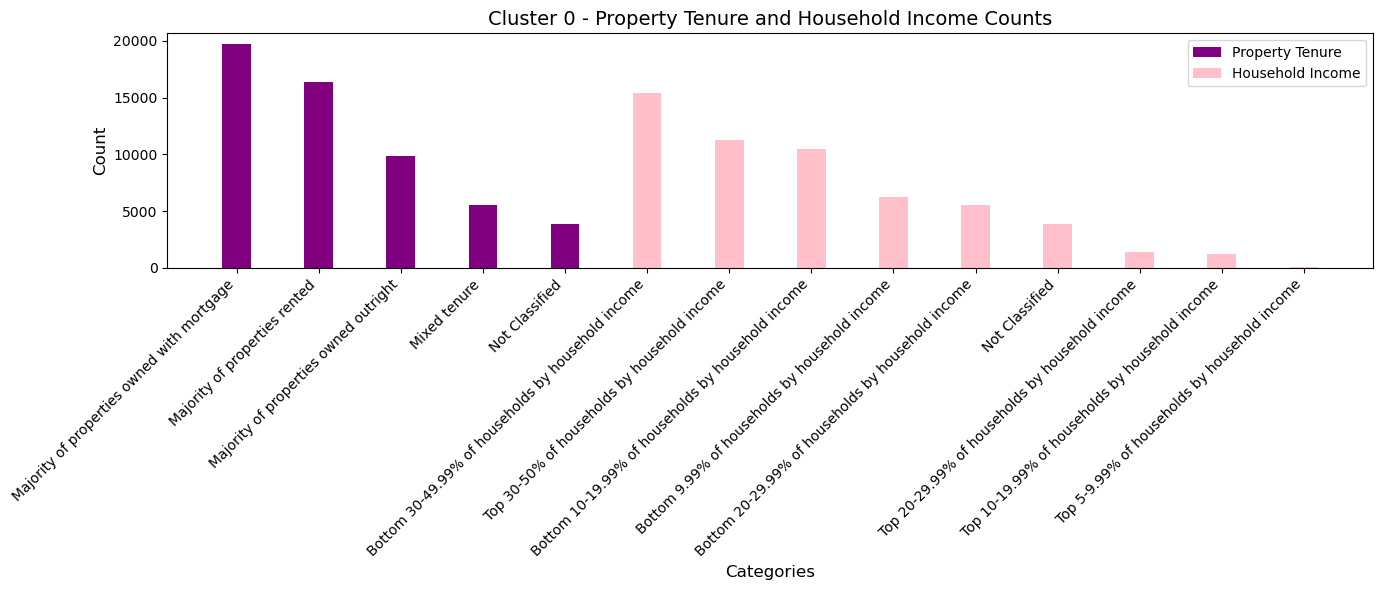

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'cleanedData1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# 1. Identify and rename relevant columns (adjust column names if needed)
df.rename(columns={'psyte_propertyTenureVariable.description': 'Property Tenure', 
                   'psyte_householdIncomeVariable.description': 'Household Income'}, inplace=True)

# 2. Count occurrences for Urban/Rural
property_tenure_counts = df['Property Tenure'].value_counts().reset_index()
property_tenure_counts.columns = ['Property Tenure', 'Count']

# 3. Count occurrences for Property Type
household_income_counts = df['Household Income'].value_counts().reset_index()
household_income_counts.columns = ['Household Income', 'Count']

# 4. Set the bar positions
bar_width = 0.35
property_tenure_x_labels = np.arange(len(property_tenure_counts))  # Positions for Urban/Rural bars
household_income_x_labels = np.arange(len(household_income_counts)) + len(property_tenure_counts)  # Shifted positions for Property Type bars

# 5. Create the bar plot
plt.figure(figsize=(14, 6))  # Increase figure size

# Plot Urban/Rural
plt.bar(property_tenure_x_labels, property_tenure_counts['Count'], width=bar_width, color='purple', label='Property Tenure')

# Plot Property Type
plt.bar(household_income_x_labels, household_income_counts['Count'], width=bar_width, color='pink', label='Household Income')

# Add labels and title
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Cluster 0 - Property Tenure and Household Income Counts', fontsize=14)

# Set x-ticks with category names
combined_labels = np.concatenate([property_tenure_counts['Property Tenure'].tolist(), household_income_counts['Household Income'].tolist()])
plt.xticks(np.concatenate([property_tenure_x_labels, household_income_x_labels]), combined_labels, rotation=45, ha='right', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_35856\520684962.py:6: DtypeWarning: Columns (70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


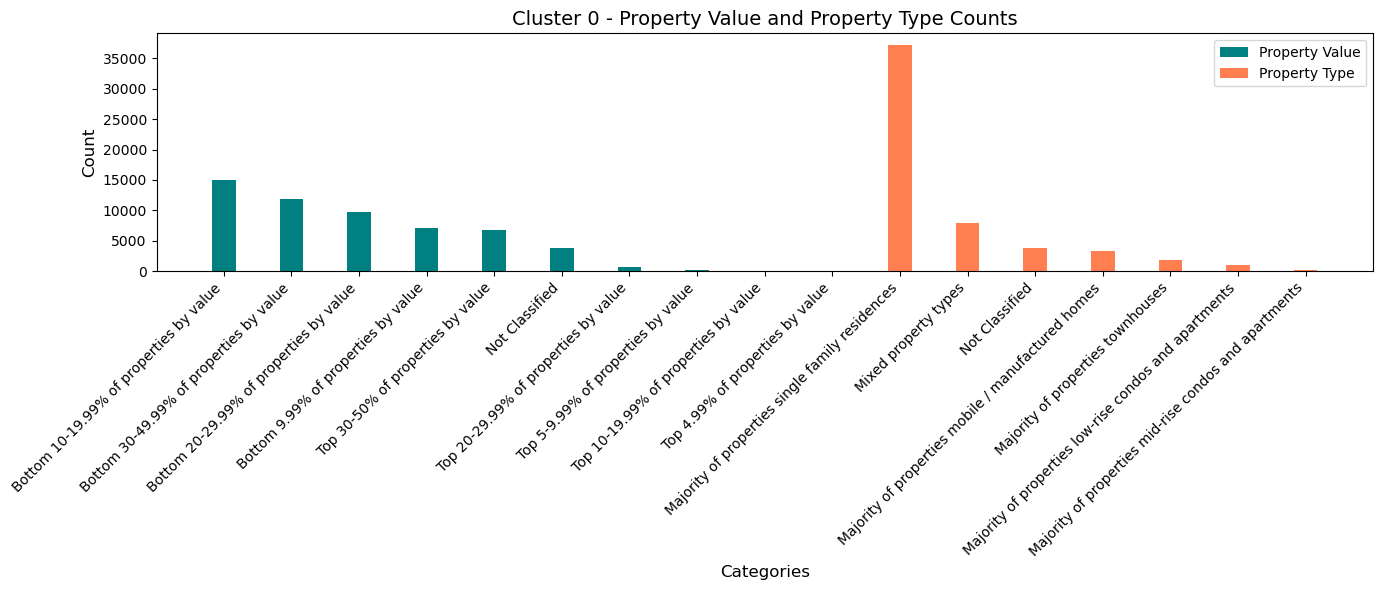

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'cleanedData1.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# 1. Identify and rename relevant columns (adjust column names if needed)
df.rename(columns={'psyte_propertyValueVariable.description': 'Property Value', 
                   'psyte_propertyTypeVariable.description': 'Property Type'}, inplace=True)

# 2. Count occurrences for Property Value
property_value_counts = df['Property Value'].value_counts().reset_index()
property_value_counts.columns = ['Property Value', 'Count']

# 3. Count occurrences for Property Type
property_type_counts = df['Property Type'].value_counts().reset_index()
property_type_counts.columns = ['Property Type', 'Count']

# 4. Set the bar positions
bar_width = 0.35
property_value_x_labels = np.arange(len(property_value_counts))  # Positions for Property Value bars
property_type_x_labels = np.arange(len(property_type_counts)) + len(property_value_counts)  # Shifted positions for Property Type bars

# 5. Create the bar plot
plt.figure(figsize=(14, 6))  # Increase figure size

# Plot Property Value with teal color
plt.bar(property_value_x_labels, property_value_counts['Count'], width=bar_width, color='teal', label='Property Value')

# Plot Property Type with coral color
plt.bar(property_type_x_labels, property_type_counts['Count'], width=bar_width, color='coral', label='Property Type')

# Add labels and title
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Cluster 0 - Property Value and Property Type Counts', fontsize=14)

# Set x-ticks with category names
combined_labels = np.concatenate([property_value_counts['Property Value'].tolist(), property_type_counts['Property Type'].tolist()])
plt.xticks(np.concatenate([property_value_x_labels, property_type_x_labels]), combined_labels, rotation=45, ha='right', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()
